#### 4.1. 어느 범죄학 연구자가 인구밀도와 절도발생률 간의 관계를 연구하면서 다음의 16개 도시의 자료를 수집하였다.
- X는 해당 도시의 단위면적당 인구밀도를, Y는 이전년도의 10만명당 절도범죄의 발생횟수를 조사한 것이다.
- 파이썬을 이용하여 회귀분석식을 구하고, 각자 회귀분석식에 대한 평가를 진행해보시기 바랍니다.

In [35]:
data = {'X':[59, 49, 75, 54, 78, 56, 60, 82, 69, 83, 88, 94, 47, 65, 89, 70],
'Y':[209, 180, 195, 192, 215, 197, 208, 189, 213, 201, 214, 212, 205, 186, 200, 204]}

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme = "chesterish")
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import numpy as np
import pandas as pd

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [36]:
data_frame = pd.DataFrame(data)
data_frame.head()

,X,Y
0,59,209
1,49,180
2,75,195
3,54,192
4,78,215


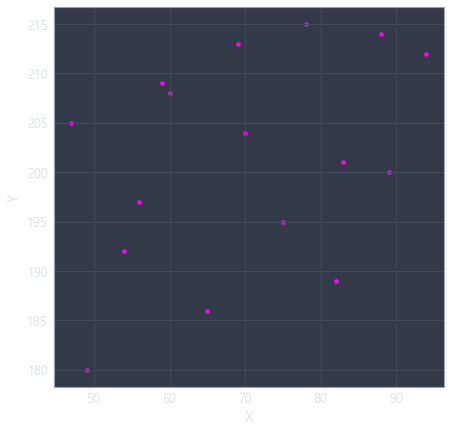

In [38]:
data_frame.plot(kind = 'scatter', x = 'X', y = 'Y', c = 'magenta',
                figsize = (7,7),)

In [49]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data_frame['X']), y = data_frame['Y'])

prediction = linear_regression.predict(X = pd.DataFrame(data_frame['X']))

print('a value = ', linear_regression.intercept_)
print('b balue =', linear_regression.coef_)

a value =  182.9724994372327
b balue = [0.26157425]


In [50]:
residuals = data_frame['Y'] - prediction
residuals.describe()

count    1.600000e+01
mean    -1.065814e-14
std      9.943299e+00
min     -1.578964e+01
25%     -6.587098e+00
50%      1.048323e+00
75%      9.433162e+00
max      1.197888e+01
Name: Y, dtype: float64

In [51]:
SSE = (residuals**2).sum()
SST = ((data_frame['Y']-data_frame['Y'].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print("R_squared =", R_squared)

R_squared = 0.13323317178816063


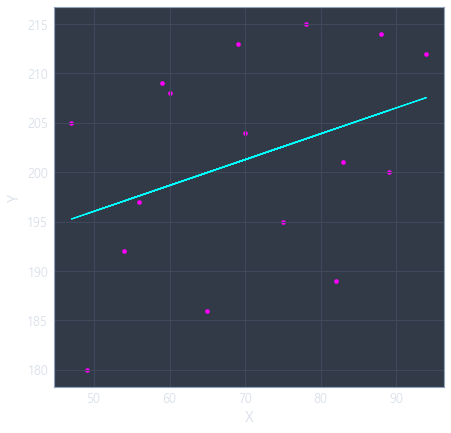

In [53]:
data_frame.plot(kind = 'scatter', x = 'X', y = 'Y', c = 'magenta',
                figsize = (7,7))

plt.plot(data_frame['X'], prediction, c = 'aqua')

In [54]:
print('score =', linear_regression.score(X = pd.DataFrame(data_frame['X']), y = data_frame['Y']))
print('Mean_Squared_Error =', mean_squared_error(prediction, data_frame["Y"]))
print('RMSE =', (mean_squared_error(prediction, data_frame["Y"]))**0.5)

score = 0.13323317178816063
Mean_Squared_Error = 92.68987769190358
RMSE = 9.627558241418411
